In [15]:
from catboost import CatBoostClassifier

import pandas as pd
import numpy as np

from catboost import Pool, CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MinMaxScaler

import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import seaborn as sns

import pickle
#import dill


In [5]:
pos_df = pd.read_csv('~/Documents/KBase/KE/IMGVR/link_predict_IMGVR_sample_extra_v3/virus_host__subtract.tsv', sep=",", header=0, index_col=0)
neg_df = pd.read_csv('~/Documents/KBase/KE/IMGVR/link_predict_IMGVR_sample_extra_v3/virus_host_NEGATIVE__subtract.tsv', sep=",", header=0, index_col=0)

dimpos = pos_df.shape
dimneg = neg_df.shape
print(dimpos)
print(dimneg)

(20851, 100)
(200714, 100)


In [7]:
train_data = pd.concat([pos_df, neg_df], axis=0)

train_labels = [1] * dimpos[0]  + [0] * dimneg[0]

In [45]:
model = CatBoostClassifier(iterations=1000,
                           #task_type="GPU",
                           #devices='0:1'
                            verbose=True
                           )

In [46]:
out = model.fit(train_data,
          train_labels,
          verbose=True)

Learning rate set to 0.103386
0:	learn: 0.6033892	total: 75.1ms	remaining: 1m 15s
1:	learn: 0.5345858	total: 122ms	remaining: 1m 1s
2:	learn: 0.4821955	total: 168ms	remaining: 56s
3:	learn: 0.4419041	total: 221ms	remaining: 55s
4:	learn: 0.4109603	total: 269ms	remaining: 53.5s
5:	learn: 0.3875609	total: 317ms	remaining: 52.5s
6:	learn: 0.3696760	total: 360ms	remaining: 51.1s
7:	learn: 0.3555931	total: 407ms	remaining: 50.5s
8:	learn: 0.3445671	total: 455ms	remaining: 50.1s
9:	learn: 0.3356971	total: 501ms	remaining: 49.6s
10:	learn: 0.3287381	total: 547ms	remaining: 49.1s
11:	learn: 0.3232791	total: 596ms	remaining: 49.1s
12:	learn: 0.3187669	total: 644ms	remaining: 48.9s
13:	learn: 0.3150721	total: 695ms	remaining: 49s
14:	learn: 0.3123415	total: 742ms	remaining: 48.7s
15:	learn: 0.3098299	total: 784ms	remaining: 48.2s
16:	learn: 0.3079379	total: 833ms	remaining: 48.2s
17:	learn: 0.3060813	total: 879ms	remaining: 47.9s
18:	learn: 0.3047159	total: 925ms	remaining: 47.8s
19:	learn: 0.30

163:	learn: 0.2659499	total: 8.54s	remaining: 43.5s
164:	learn: 0.2657674	total: 8.6s	remaining: 43.5s
165:	learn: 0.2656030	total: 8.65s	remaining: 43.5s
166:	learn: 0.2654151	total: 8.71s	remaining: 43.4s
167:	learn: 0.2653306	total: 8.76s	remaining: 43.4s
168:	learn: 0.2651844	total: 8.8s	remaining: 43.3s
169:	learn: 0.2650939	total: 8.86s	remaining: 43.2s
170:	learn: 0.2650054	total: 8.9s	remaining: 43.2s
171:	learn: 0.2648418	total: 8.96s	remaining: 43.1s
172:	learn: 0.2646827	total: 9.01s	remaining: 43.1s
173:	learn: 0.2645362	total: 9.06s	remaining: 43s
174:	learn: 0.2644032	total: 9.12s	remaining: 43s
175:	learn: 0.2642331	total: 9.17s	remaining: 43s
176:	learn: 0.2640954	total: 9.23s	remaining: 42.9s
177:	learn: 0.2639295	total: 9.28s	remaining: 42.9s
178:	learn: 0.2637628	total: 9.33s	remaining: 42.8s
179:	learn: 0.2636178	total: 9.39s	remaining: 42.8s
180:	learn: 0.2635635	total: 9.43s	remaining: 42.7s
181:	learn: 0.2635045	total: 9.48s	remaining: 42.6s
182:	learn: 0.2633427

322:	learn: 0.2483795	total: 16.8s	remaining: 35.3s
323:	learn: 0.2483267	total: 16.9s	remaining: 35.2s
324:	learn: 0.2482822	total: 16.9s	remaining: 35.2s
325:	learn: 0.2482545	total: 17s	remaining: 35.1s
326:	learn: 0.2482140	total: 17s	remaining: 35s
327:	learn: 0.2481731	total: 17.1s	remaining: 35s
328:	learn: 0.2480868	total: 17.1s	remaining: 34.9s
329:	learn: 0.2480471	total: 17.2s	remaining: 34.9s
330:	learn: 0.2479538	total: 17.2s	remaining: 34.8s
331:	learn: 0.2479102	total: 17.3s	remaining: 34.8s
332:	learn: 0.2478138	total: 17.4s	remaining: 34.8s
333:	learn: 0.2476992	total: 17.4s	remaining: 34.7s
334:	learn: 0.2476068	total: 17.5s	remaining: 34.7s
335:	learn: 0.2475310	total: 17.5s	remaining: 34.6s
336:	learn: 0.2475029	total: 17.5s	remaining: 34.5s
337:	learn: 0.2474708	total: 17.6s	remaining: 34.5s
338:	learn: 0.2473804	total: 17.6s	remaining: 34.4s
339:	learn: 0.2472685	total: 17.7s	remaining: 34.3s
340:	learn: 0.2471657	total: 17.7s	remaining: 34.3s
341:	learn: 0.247061

483:	learn: 0.2374415	total: 25.4s	remaining: 27s
484:	learn: 0.2374093	total: 25.4s	remaining: 27s
485:	learn: 0.2373827	total: 25.5s	remaining: 27s
486:	learn: 0.2373556	total: 25.5s	remaining: 26.9s
487:	learn: 0.2372752	total: 25.6s	remaining: 26.9s
488:	learn: 0.2372059	total: 25.7s	remaining: 26.8s
489:	learn: 0.2371285	total: 25.7s	remaining: 26.8s
490:	learn: 0.2370425	total: 25.8s	remaining: 26.7s
491:	learn: 0.2369633	total: 25.8s	remaining: 26.7s
492:	learn: 0.2368883	total: 25.9s	remaining: 26.6s
493:	learn: 0.2367845	total: 25.9s	remaining: 26.6s
494:	learn: 0.2367062	total: 26s	remaining: 26.5s
495:	learn: 0.2366259	total: 26.1s	remaining: 26.5s
496:	learn: 0.2365968	total: 26.1s	remaining: 26.4s
497:	learn: 0.2365231	total: 26.2s	remaining: 26.4s
498:	learn: 0.2364949	total: 26.2s	remaining: 26.3s
499:	learn: 0.2364379	total: 26.3s	remaining: 26.3s
500:	learn: 0.2364016	total: 26.3s	remaining: 26.2s
501:	learn: 0.2363733	total: 26.4s	remaining: 26.1s
502:	learn: 0.236330

642:	learn: 0.2287319	total: 33.7s	remaining: 18.7s
643:	learn: 0.2287139	total: 33.8s	remaining: 18.7s
644:	learn: 0.2286935	total: 33.8s	remaining: 18.6s
645:	learn: 0.2286225	total: 33.9s	remaining: 18.6s
646:	learn: 0.2285900	total: 33.9s	remaining: 18.5s
647:	learn: 0.2285324	total: 34s	remaining: 18.5s
648:	learn: 0.2284741	total: 34s	remaining: 18.4s
649:	learn: 0.2284523	total: 34.1s	remaining: 18.4s
650:	learn: 0.2284025	total: 34.1s	remaining: 18.3s
651:	learn: 0.2283817	total: 34.2s	remaining: 18.2s
652:	learn: 0.2282987	total: 34.3s	remaining: 18.2s
653:	learn: 0.2282166	total: 34.3s	remaining: 18.2s
654:	learn: 0.2281495	total: 34.4s	remaining: 18.1s
655:	learn: 0.2280790	total: 34.4s	remaining: 18.1s
656:	learn: 0.2280587	total: 34.5s	remaining: 18s
657:	learn: 0.2280095	total: 34.5s	remaining: 18s
658:	learn: 0.2279482	total: 34.6s	remaining: 17.9s
659:	learn: 0.2278905	total: 34.7s	remaining: 17.9s
660:	learn: 0.2278205	total: 34.7s	remaining: 17.8s
661:	learn: 0.227773

803:	learn: 0.2214324	total: 42.4s	remaining: 10.3s
804:	learn: 0.2213717	total: 42.4s	remaining: 10.3s
805:	learn: 0.2213521	total: 42.5s	remaining: 10.2s
806:	learn: 0.2213376	total: 42.5s	remaining: 10.2s
807:	learn: 0.2212754	total: 42.6s	remaining: 10.1s
808:	learn: 0.2212165	total: 42.6s	remaining: 10.1s
809:	learn: 0.2211921	total: 42.7s	remaining: 10s
810:	learn: 0.2211714	total: 42.7s	remaining: 9.96s
811:	learn: 0.2211577	total: 42.8s	remaining: 9.9s
812:	learn: 0.2211459	total: 42.8s	remaining: 9.85s
813:	learn: 0.2210901	total: 42.9s	remaining: 9.8s
814:	learn: 0.2210202	total: 42.9s	remaining: 9.75s
815:	learn: 0.2210071	total: 43s	remaining: 9.69s
816:	learn: 0.2209484	total: 43s	remaining: 9.64s
817:	learn: 0.2209231	total: 43.1s	remaining: 9.59s
818:	learn: 0.2208956	total: 43.1s	remaining: 9.53s
819:	learn: 0.2208776	total: 43.2s	remaining: 9.48s
820:	learn: 0.2208181	total: 43.2s	remaining: 9.43s
821:	learn: 0.2207648	total: 43.3s	remaining: 9.38s
822:	learn: 0.220742

962:	learn: 0.2151972	total: 50.9s	remaining: 1.95s
963:	learn: 0.2151754	total: 50.9s	remaining: 1.9s
964:	learn: 0.2151186	total: 51s	remaining: 1.85s
965:	learn: 0.2150648	total: 51s	remaining: 1.8s
966:	learn: 0.2150447	total: 51.1s	remaining: 1.74s
967:	learn: 0.2150144	total: 51.1s	remaining: 1.69s
968:	learn: 0.2149505	total: 51.2s	remaining: 1.64s
969:	learn: 0.2149305	total: 51.2s	remaining: 1.58s
970:	learn: 0.2149122	total: 51.3s	remaining: 1.53s
971:	learn: 0.2148536	total: 51.3s	remaining: 1.48s
972:	learn: 0.2148070	total: 51.4s	remaining: 1.43s
973:	learn: 0.2147620	total: 51.4s	remaining: 1.37s
974:	learn: 0.2147116	total: 51.5s	remaining: 1.32s
975:	learn: 0.2146910	total: 51.5s	remaining: 1.27s
976:	learn: 0.2146432	total: 51.6s	remaining: 1.21s
977:	learn: 0.2145788	total: 51.7s	remaining: 1.16s
978:	learn: 0.2145179	total: 51.7s	remaining: 1.11s
979:	learn: 0.2144923	total: 51.8s	remaining: 1.06s
980:	learn: 0.2144696	total: 51.8s	remaining: 1s
981:	learn: 0.2144464

In [47]:
feature_importance = model.get_feature_importance(type= "PredictionValuesChange")
print(feature_importance)

[2.2470589  0.98551956 1.25569153 1.09292289 0.55749023 0.97959451
 0.72734373 0.88570151 0.81140796 0.71242666 0.50759203 0.89927828
 0.85495159 0.62384589 0.93768602 0.92723004 0.63787576 0.94988888
 1.50856636 0.75792122 0.84651336 0.7987841  1.0874905  0.88436928
 0.99399324 0.91077635 0.83618917 0.92303905 1.0694121  0.77452008
 1.1371924  1.17436723 1.06048516 0.8462462  0.91687258 1.1127999
 0.97494809 0.97634614 0.78185142 0.96621608 0.5773716  0.93873992
 0.66397488 0.84119324 1.87694057 3.45485088 0.66096427 1.07456501
 1.1675115  0.97644052 1.00773163 1.10493968 0.705544   0.65807434
 1.15795131 1.09864392 1.00830186 1.22518716 0.83709689 0.76353192
 0.91307117 0.73731116 0.96781924 1.62536043 1.6612749  1.19835279
 0.73858573 0.73083684 0.82491355 0.66131999 1.06016982 1.4764273
 0.89497501 0.90006679 1.78227303 1.28161441 1.5464716  1.10044254
 0.80361684 0.64549167 0.55738677 0.99077905 2.09595773 0.78984257
 0.60872942 1.17731106 0.69225658 0.63659821 1.74934198 0.802190

In [48]:
type(feature_importance)

numpy.ndarray

In [49]:
range(1,feature_importance.size)

range(1, 100)

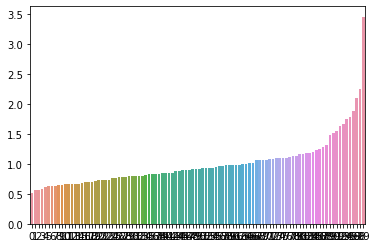

In [50]:
#df = pd.DataFrame(data=feature_importance, columns=["feature_importance"])

sns.barplot(x=list(range(df.shape[0])), y=np.sort(feature_importance))